## Python statistics essential training - 04_02_confidenceintervals

Standard imports

This notebook pertains to an election between two candidates, Brown and Green. The data is polling data from election voters.

In [1]:
import math
import io

In [2]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as pp

%matplotlib inline

In [3]:
import scipy.stats
import scipy.optimize
import scipy.spatial

In [26]:
# load the poll data
poll = pd.read_csv('poll.csv')

In [5]:
poll.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   vote    1000 non-null   object
dtypes: object(1)
memory usage: 7.9+ KB


In [23]:
poll.head()

,vote
0,Brown
1,Green
2,Brown
3,Brown
4,Brown


In [27]:
# this data implies that Brown will likely remain the mayor
poll.vote.value_counts(normalize=True)

Brown    0.511
Green    0.489
Name: vote, dtype: float64

In [29]:
# this creates 5 random samples and checks whether they are less than the True value of 0.511
np.random.rand(5) < 0.51

array([False,  True,  True,  True, False])

In [33]:
# this np.where converts the boolean value above into a string
np.where(np.random.rand(5) < 0.51,'Brown','Green')

array(['Green', 'Brown', 'Brown', 'Green', 'Brown'], dtype='<U5')

In [34]:
# this sample takes the number of votes for Brown, and a sample
def sample(brown,n=1000):
    return pd.DataFrame({'vote': np.where(np.random.rand(n) < brown,'Brown','Green')})

In [9]:
s = sample(0.51,n=1000)

In [10]:
s.vote.value_counts(normalize=True)

Brown    0.529
Green    0.471
Name: vote, dtype: float64

In [37]:
# this does 1,000 simulated experiments
dist = pd.DataFrame([sample(0.51).vote.value_counts(normalize=True) for i in range(1000)])

In [38]:
dist.head()

,Brown,Green
vote,0.520,0.480
vote,0.497,0.503
vote,0.538,0.462
vote,0.510,0.490
vote,0.510,0.490


<AxesSubplot:>

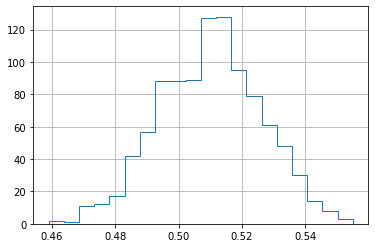

In [39]:
dist.Brown.hist(histtype='step',bins=20)

This means for a true Brown fraction of 0.51, we may obtain any sample proportion from 0.47 to 0.55.

In [40]:
# this is a sampling distribution for ANY Brown fraction
def samplingdist(brown,n=1000):
    return pd.DataFrame([sample(brown,n).vote.value_counts(normalize=True) for i in range(1000)])

In [41]:
# this is for 95% confidence interval
def quantiles(brown,n=1000):
    dist = samplingdist(brown,n)
    return dist.Brown.quantile(0.025), dist.Brown.quantile(0.975)

In the next steps, we try to find the value that gets 0.51 on each side.  See below that this occurs with 0.48 and 0.54. That means that for an observed sample proportion of 0.51, when the sample size is 1000, the 95% confidence interval for the true population function is 0.48 to 0.54.

95% confidence interval: [0.48, 0.54]

Another way of saying this is that:

Estimate = 0.51 +- 0.03 (at 95% confidence)
    where the point estimate is 0.51 and the margin of error is 0.03

In [16]:
quantiles(0.50)

(0.469975, 0.530025)

In [17]:
quantiles(0.48)

(0.446, 0.511)

In [18]:
quantiles(0.54)

(0.507, 0.573)

In [44]:
# this creates the sampling distribution again, with 10000 samples
dist = samplingdist(0.50,10000)

<AxesSubplot:>

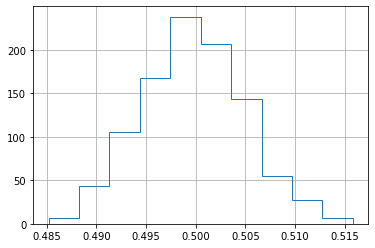

In [43]:
dist.Brown.hist(histtype='step')

In this histogram, we should see that the margin of error has shrunk. The lecturer said in his example that the margin of error was around 1%, which would give us enough conficence that Brown is the likely winner.

In [21]:
largepoll = pd.read_csv('poll-larger.csv')

In [22]:
largepoll.vote.value_counts(normalize=True)

Green    0.5181
Brown    0.4819
Name: vote, dtype: float64